# Лабораторна робота №2
## Тема: sklearn.datasets.make_regression
### Завдання
1. Поглиблено вивчити функцію make_regression.
2. Згенерувати набір даних за допомогою означеної функції, з використанням якнайбільшої кількості параметрів.
3. Розмірність набору даних прийняти у вигляді (100000х(30-n)), де n - номер за списком.
4. Здійснити моделювання згенерованого набору даних та візуалізацію результатів.
5. Результати оформити у вигляді файлів:
- набір даних у форматі .csv
- код для формування набору даних у форматі .ipynb
- код для моделювання та візуалізації у форматі .ipynb
6. Результати викласти у репозиторії GitHub (папка Lab2).
7. Підготуватися до захисту лабораторрної роботи (пояснення коду, відповіді на запитання за темою)

## Виконала
### студентка 4 курсу
### групи АнД-41
### Кліменкова Ніна
### Варіант 7

## Бібліотеки

In [98]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import mae ,mse
from tensorflow.keras.optimizers import SGD, Adam

## Data preprocessing

In [134]:
#читаємо дані
dataset = pd.read_csv('data.csv', header = None, skiprows = 1)
dataset = dataset.drop(columns=dataset.columns[0], axis=1, inplace=False)
dataset.head()


,1,2,3,4,5,6,7,8,9,10,...,14,15,16,17,18,19,20,21,22,23
0,-0.377364,0.166759,0.682802,1.921379,-0.197037,-0.759879,-2.089066,-0.036373,-1.217749,-1.428905,...,-1.408500,0.839550,-0.099625,-1.736265,-0.307186,-0.080870,0.834319,1.885460,0.440898,-56.543752
1,0.439874,1.070767,0.404252,0.133472,1.937107,1.002275,-0.047000,1.153260,0.019985,-1.579930,...,-0.412130,1.049545,1.663777,0.603633,0.231452,0.368404,-0.497894,1.567452,0.469145,397.366406
2,0.545377,-0.331197,-0.960112,-0.854184,1.676691,-0.461345,0.253380,0.760322,0.283970,-0.469825,...,0.112940,0.636776,-0.657319,0.569960,0.949293,1.057859,0.603935,0.008752,0.055171,-131.140456
3,0.895592,0.963320,0.036998,1.260493,-0.776506,0.764746,0.394545,0.105635,0.168128,-0.090767,...,0.757635,1.345002,-0.816321,0.992483,0.492420,0.936222,1.138867,0.706138,-1.002387,467.277886
4,-1.810059,-0.187311,1.004061,-0.046574,-1.019231,0.428562,-0.258505,0.093073,-0.992287,-0.307212,...,2.695360,-0.885228,1.584732,-2.152585,0.743499,1.047942,1.865123,-0.337572,0.886760,199.481132


In [135]:
dataset.shape

(100000, 23)

 ## Створення моделі

In [136]:
X = dataset.drop(columns=dataset.iloc[:,-1:], axis=1)
Y = dataset.iloc[:,-1:]
#розділяємо на тренувальну, валідаційну та тестувальну вибірки
X_train, x_val, Y_train, y_val = train_test_split(X,Y, test_size=0.2)
x_val, X_test, y_val, Y_test = train_test_split(x_val,y_val, test_size=0.5)

In [123]:
#X_train.shape
#X_test.shape
x_val.shape

(10000, 22)

In [137]:
tf.random.set_seed(49)
model = Sequential([Dense(10),Dense(1)])
model.compile(loss=mae, optimizer=SGD(), metrics=[mae])
history = model.fit(X_train,Y_train, epochs = 5, batch_size = 100,validation_data=(x_val,y_val))

Epoch 1/5
800/800 [==============================] - 1s 702us/step - loss: 92.6785 - mean_absolute_error: 92.6785 - val_loss: 1.8059 - val_mean_absolute_error: 1.8059
Epoch 2/5
800/800 [==============================] - 0s 581us/step - loss: 1.7185 - mean_absolute_error: 1.7185 - val_loss: 1.6553 - val_mean_absolute_error: 1.6553
Epoch 3/5
800/800 [==============================] - 0s 575us/step - loss: 1.7111 - mean_absolute_error: 1.7111 - val_loss: 1.5569 - val_mean_absolute_error: 1.5569
Epoch 4/5
800/800 [==============================] - 0s 563us/step - loss: 1.7137 - mean_absolute_error: 1.7137 - val_loss: 1.7583 - val_mean_absolute_error: 1.7583
Epoch 5/5
800/800 [==============================] - 0s 567us/step - loss: 1.7204 - mean_absolute_error: 1.7204 - val_loss: 1.5083 - val_mean_absolute_error: 1.5083


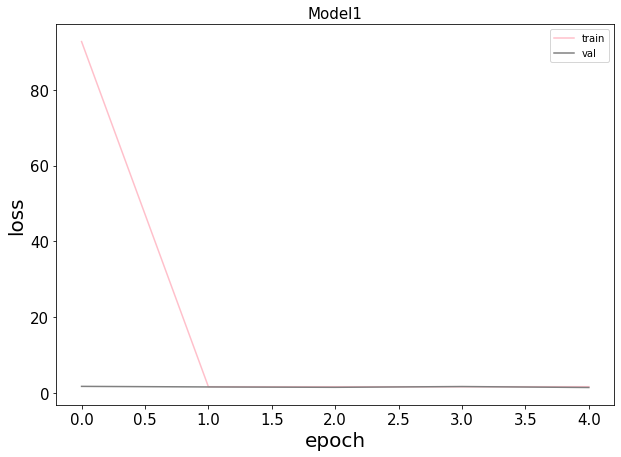

In [138]:
fig, ax = plt.subplots(1, 1, figsize=(10,7))
ax.plot(history.history['loss'], 'pink', label='train')
ax.plot(history.history['val_loss'], 'grey' ,label='val')
ax.set_xlabel(r'epoch', fontsize=20)
ax.set_ylabel(r'loss', fontsize=20)
ax.legend()
plt.title("Model1", fontsize = 15)
plt.legend(prop={'size': 10})
ax.tick_params(labelsize=15)

## Налаштовуэмо модель

In [139]:
tf.random.set_seed(49)
new_model = Sequential([Dense(10),Dense(20)])
new_model.compile(loss=mae, optimizer=Adam(), metrics=[mae])
new_history = new_model.fit(X_train,Y_train, epochs = 10, batch_size = 100,validation_data=(x_val,y_val))

Epoch 1/10
800/800 [==============================] - 1s 905us/step - loss: 205.2309 - mean_absolute_error: 205.2309 - val_loss: 178.8063 - val_mean_absolute_error: 178.8063
Epoch 2/10
800/800 [==============================] - 1s 1ms/step - loss: 126.9262 - mean_absolute_error: 126.9262 - val_loss: 69.9467 - val_mean_absolute_error: 69.9467
Epoch 3/10
800/800 [==============================] - 1s 727us/step - loss: 21.8190 - mean_absolute_error: 21.8190 - val_loss: 0.5731 - val_mean_absolute_error: 0.5731
Epoch 4/10
800/800 [==============================] - 1s 712us/step - loss: 0.4190 - mean_absolute_error: 0.4190 - val_loss: 0.2819 - val_mean_absolute_error: 0.2819
Epoch 5/10
800/800 [==============================] - 1s 726us/step - loss: 0.1791 - mean_absolute_error: 0.1791 - val_loss: 0.0970 - val_mean_absolute_error: 0.0970
Epoch 6/10
800/800 [==============================] - 1s 691us/step - loss: 0.0615 - mean_absolute_error: 0.0615 - val_loss: 0.0389 - val_mean_absolute_erro

In [73]:
Y_test.shape

(10000, 1)

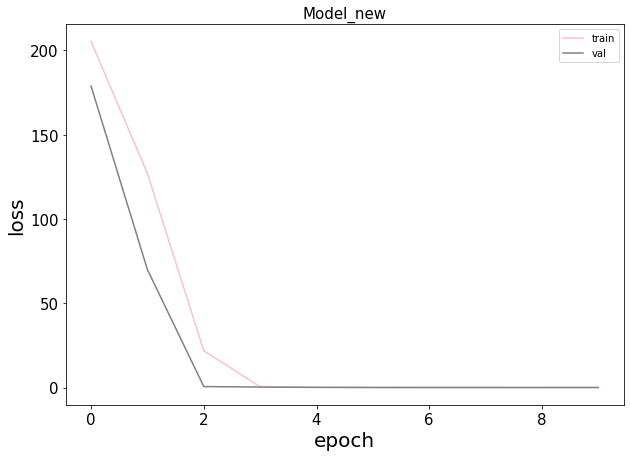

In [140]:
fig, ax = plt.subplots(1, 1, figsize=(10,7))
ax.plot(new_history.history['loss'], 'pink', label='train')
ax.plot(new_history.history['val_loss'], 'grey' ,label='val')
ax.set_xlabel(r'epoch', fontsize=20)
ax.set_ylabel(r'loss', fontsize=20)
ax.legend()
plt.title("Model_new", fontsize = 15)
plt.legend(prop={'size': 10})
ax.tick_params(labelsize=15)

## Явище оверфітінгу(якого не вдалось досягти)

In [141]:
tf.random.set_seed(49)
model_over = Sequential([Dense(20),Dense(10),Dense(1)])
model_over.compile(loss=mae, optimizer=Adam(), metrics=[mae])
history_over = model_over.fit(X_train,Y_train, epochs = 100, batch_size = 300,validation_data=(x_val,y_val))

Epoch 1/100
267/267 [==============================] - 1s 1ms/step - loss: 195.2528 - mean_absolute_error: 195.2528 - val_loss: 132.7307 - val_mean_absolute_error: 132.7307
Epoch 2/100
267/267 [==============================] - 0s 884us/step - loss: 32.9638 - mean_absolute_error: 32.9638 - val_loss: 0.0975 - val_mean_absolute_error: 0.0975
Epoch 3/100
267/267 [==============================] - 0s 850us/step - loss: 0.0807 - mean_absolute_error: 0.0807 - val_loss: 0.0617 - val_mean_absolute_error: 0.0617
Epoch 4/100
267/267 [==============================] - 0s 837us/step - loss: 0.0737 - mean_absolute_error: 0.0737 - val_loss: 0.0513 - val_mean_absolute_error: 0.0513
Epoch 5/100
267/267 [==============================] - 0s 834us/step - loss: 0.0719 - mean_absolute_error: 0.0719 - val_loss: 0.0952 - val_mean_absolute_error: 0.0952
Epoch 6/100
267/267 [==============================] - 0s 870us/step - loss: 0.0634 - mean_absolute_error: 0.0634 - val_loss: 0.0658 - val_mean_absolute_erro

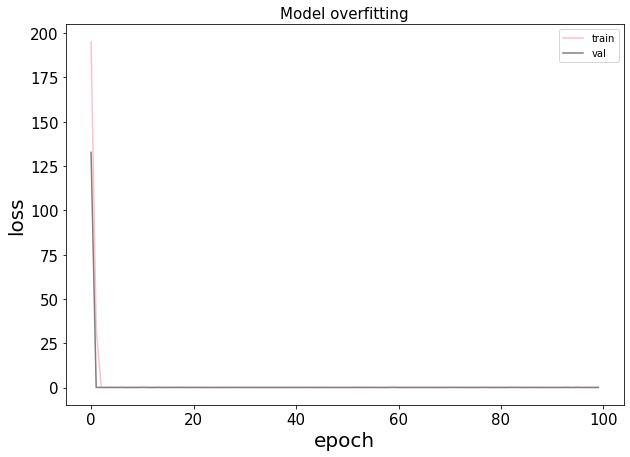

In [142]:
fig, ax = plt.subplots(1, 1, figsize=(10,7))
ax.plot(history_over.history['loss'], 'pink', label='train')
ax.plot(history_over.history['val_loss'], 'grey' ,label='val')
ax.set_xlabel(r'epoch', fontsize=20)
ax.set_ylabel(r'loss', fontsize=20)
ax.legend()
plt.title("Model overfitting", fontsize = 15)
plt.legend(prop={'size': 10})
ax.tick_params(labelsize=15)

In [143]:
tf.random.set_seed(49)
model_complex = Sequential([Dense(30),Dense(20),Dense(10),Dense(1)])
model_complex.compile(loss=mae, optimizer=Adam(), metrics=[mae])
history_complex = model_complex.fit(X_train,Y_train, epochs = 20, batch_size = 256,validation_data=(x_val,y_val))

Epoch 1/20
313/313 [==============================] - 1s 2ms/step - loss: 95.9196 - mean_absolute_error: 95.9196 - val_loss: 0.4150 - val_mean_absolute_error: 0.4150
Epoch 2/20
313/313 [==============================] - 0s 1ms/step - loss: 0.2341 - mean_absolute_error: 0.2341 - val_loss: 0.2975 - val_mean_absolute_error: 0.2975
Epoch 3/20
313/313 [==============================] - 0s 1ms/step - loss: 0.2017 - mean_absolute_error: 0.2017 - val_loss: 0.1533 - val_mean_absolute_error: 0.1533
Epoch 4/20
313/313 [==============================] - 0s 940us/step - loss: 0.1782 - mean_absolute_error: 0.1782 - val_loss: 0.2639 - val_mean_absolute_error: 0.2639
Epoch 5/20
313/313 [==============================] - 0s 956us/step - loss: 0.1900 - mean_absolute_error: 0.1900 - val_loss: 0.2843 - val_mean_absolute_error: 0.2843
Epoch 6/20
313/313 [==============================] - 0s 994us/step - loss: 0.1977 - mean_absolute_error: 0.1977 - val_loss: 0.2142 - val_mean_absolute_error: 0.2142
Epoch 7/

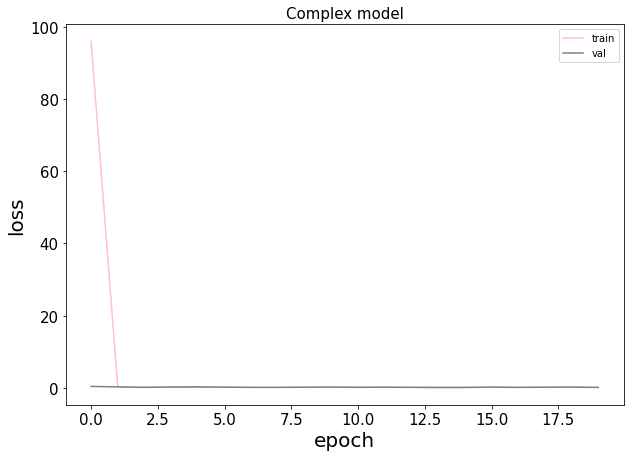

In [144]:
fig, ax = plt.subplots(1, 1, figsize=(10,7))
ax.plot(history_complex.history['loss'], 'pink', label='train')
ax.plot(history_complex.history['val_loss'], 'grey' ,label='val')
ax.set_xlabel(r'epoch', fontsize=20)
ax.set_ylabel(r'loss', fontsize=20)
ax.legend()
plt.title("Complex model", fontsize = 15)
plt.legend(prop={'size': 10})
ax.tick_params(labelsize=15)


## Прогноз

In [150]:
Y_hat = model.predict(X_test)
Y_hat_new = new_model.predict(X_test)
Y_hat_over = model_over.predict(X_test)
Y_hat_complex = model_complex.predict(X_test)

In [146]:
X_test.shape

(10000, 22)

## Візуалізація

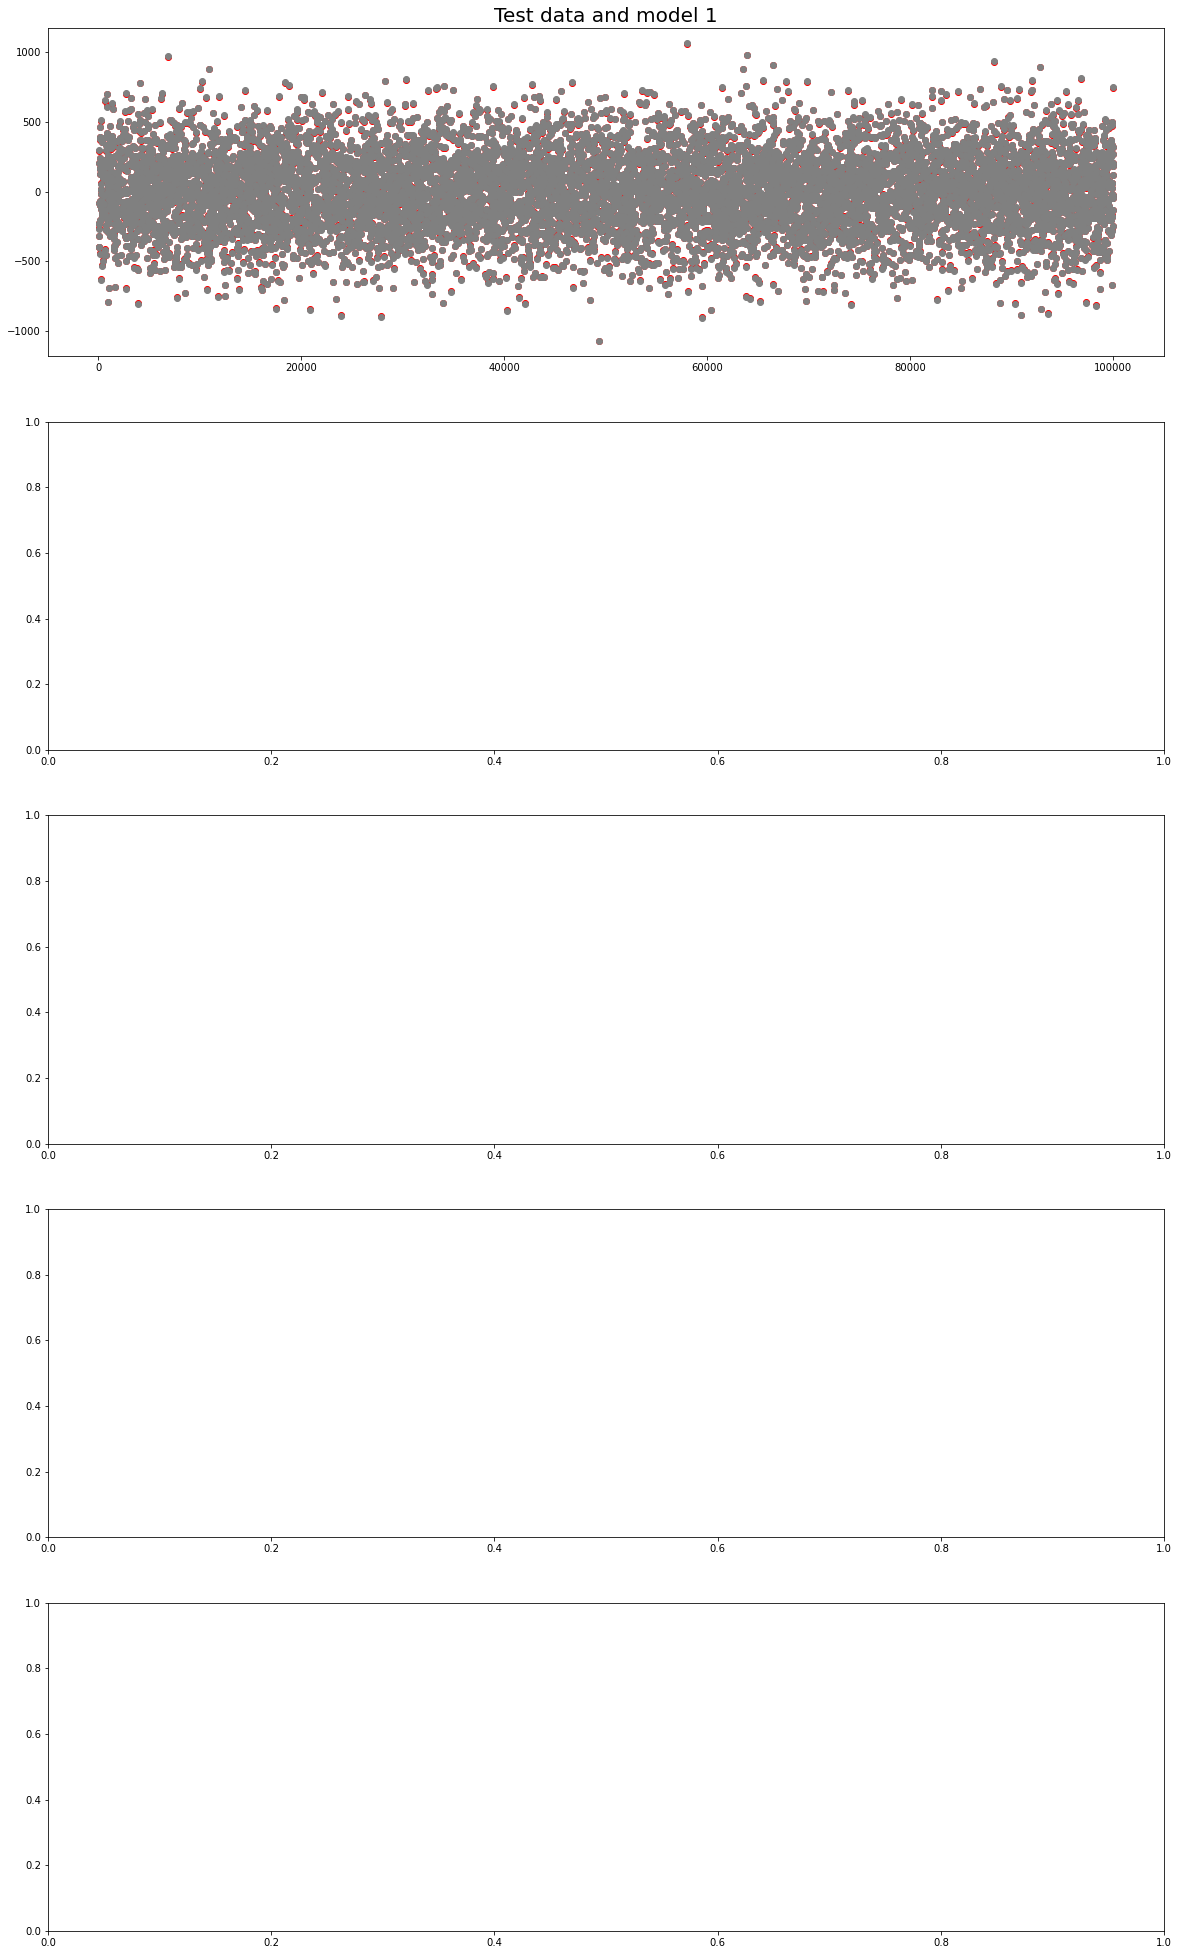

In [156]:
fig,axs = plt.subplots(5, figsize=(20, 35))
axs[0].set_title('Test data and model 1',fontsize=20)
axs[0].scatter(X_test.index, Y_test, c='red', label='Test data')
axs[0].scatter(X_test.index, Y_hat, c='grey', label='First model')

## Висновок
У ході виконання даної лабораторної роботи була детально вивчена функція make_regression та її застосування. Розроблено декілька моделей за допомогою яких було визначено вплив гіперпараметрів на результати роботи і точності моделей та візуалізовано результати.